<a href="https://colab.research.google.com/github/TatanPerez/4101135-Modelado_Simulacion/blob/main/2_One-Dimensional%20Flows/2_1_A_Geometric_Way_of_Thinking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chapter 2 - Flows on the Line**

Wilmer Sebastian Perez Cuastumal

Universidad Nacional de Colombia

25/08/2025

## **2.1 Una forma geometrica de pensar**

**2.1.1**
Encuentra todos los puntos fijos del flujo.

**Solución**

\begin{equation}
sin(x)=0\\
x= n\pi, n\in\mathbb Z\\
\frac{dx}{dt}=sin(x)\\
t=\int\ csc(x)dx\\
t=\int\ csc(x)(csc(x)+cot(x))csc(x)+cot(x)dx\\
t=\int\ csc2(x)+cot(x)csc(x)csc(x)+cot(x)dx \\
sustitucion:\\
u=csc(x)+cot(x)\ \\
\longrightarrow\ \frac{du}{dx}=-{csc}^2(x)-cot(x)csc(x)\\
\longrightarrow\ dx=1-{csc}^2(x)-cot(x)csc(x)du\\
t=-\int1/udu\\
t=-ln(u)\\
t=-ln(csc(x)+cot(x))\\
x=\frac{1}{2} i e^{-i x} - \frac{1}{2} i e^{i x}
\end{equation}

Busqueda de puntos fijos
\begin{equation}
\dot{x}=sin(x)\\
\ddot{x}=cos(x)\\
\end{equation}
Buscamos los puntos $x^{*}$
\begin{equation}
sin(x^{*})=0\\
x^{*}_{1}=2\pi n,\:x^{*}_{2}=\pi +2\pi n
\end{equation}
Luego

$\ddot{x}(x^{*}_{1})=cos(2\pi n)=1 \rightarrow$ punto fijo inestable\
$\ddot{x}(x^{*}_{2})=cos(\pi+2\pi n)=-1 \rightarrow$ punto fijo estable

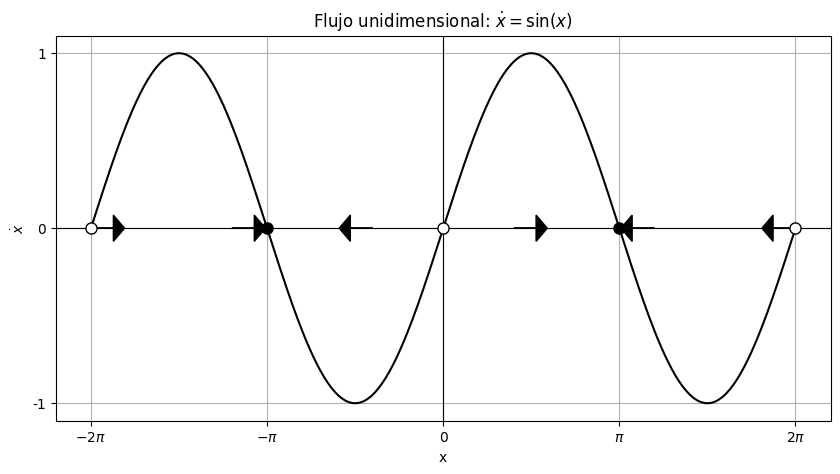

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos f(x) = sin(x)
def f(x):
    return np.sin(x)

# Rango de x
x_vals = np.linspace(-2*np.pi, 2*np.pi, 400)
f_vals = f(x_vals)

# Puntos fijos (n*pi)
fixed_points = [n*np.pi for n in range(-2, 3)]

plt.figure(figsize=(10,5))

# Graficar f(x)
plt.plot(x_vals, f_vals, 'k')
plt.axhline(0, color="black", linewidth=0.8)
plt.axvline(0, color="black", linewidth=0.8)

# Marcar puntos fijos
for n, fp in enumerate(fixed_points):
    if n % 2 == 0:  # pares -> inestables (círculo blanco)
        plt.plot(fp, 0, 'wo', markersize=8, markeredgecolor='k')
    else:           # impares -> estables (círculo negro)
        plt.plot(fp, 0, 'ko', markersize=8)

# Flechas en el eje x
for x in np.linspace(-2*np.pi, 2*np.pi, 6):
    dx = f(x)
    if dx > 0:
        plt.arrow(x, 0, 0.4, 0, head_width=0.15, head_length=0.2, fc='k', ec='k')
    elif dx < 0:
        plt.arrow(x, 0, -0.4, 0, head_width=0.15, head_length=0.2, fc='k', ec='k')

plt.xticks([ -2*np.pi, -np.pi, 0, np.pi, 2*np.pi ],
           [r"$-2\pi$", r"$-\pi$", "0", r"$\pi$", r"$2\pi$"])
plt.yticks([-1, 0, 1], ['-1', '0', '1'])
plt.xlabel("x")
plt.ylabel(r"$\dot{x}$")
plt.title(r"Flujo unidimensional: $\dot{x} = \sin(x)$")
plt.grid(True)
plt.show()


Solucionamos con los siguientes metodos:
1. Uso de sympy
2. Uso de Euler
3. Uso de Ruge-Kutta
4. Uso de odeint
5. Sugerencia de uso de solve_ivp

## 1. Uso de Sympy

Explicación del código en Sympy para resolver $ \dot{x} = \sin(x) $

En este bloque de código se resuelve simbólicamente la ecuación diferencial autónoma:

$$
\dot{x} = \sin(x), \qquad x(0)=x_0
$$


utilizando separación de variables e integración con la librería **Sympy**.

---

### Definición de variables simbólicas
```python
t = sp.Symbol('t')
x = sp.Symbol('x')
x0 = sp.Symbol('x0')


In [6]:
import sympy as sp

# Definimos variables simbólicas
t = sp.Symbol('t')
x = sp.Symbol('x')
x0 = sp.Symbol('x0')

# Integral por separación de variables
integral = sp.integrate(1/sp.sin(x), x)
print("Integral =", integral)

# General solution: t = integral + C
C = sp.Symbol('C')
sol_general = sp.Eq(t, integral + C)
print("General solution:", sol_general)

# Evaluar la constante con condición inicial x(0)=x0
C_expr = sp.simplify(-sp.log(sp.csc(x0) + sp.cot(x0)))
print("Constante C =", C_expr)

# Sustituir C en la solución
sol_with_C = sp.Eq(t, -sp.log(sp.csc(x) + sp.cot(x)) - C_expr)
sol_final = sp.simplify(sol_with_C)
print("Solución final:", sol_final)


Integral = log(cos(x) - 1)/2 - log(cos(x) + 1)/2
General solution: Eq(t, C + log(cos(x) - 1)/2 - log(cos(x) + 1)/2)
Constante C = -log(cot(x0) + csc(x0))
Solución final: Eq(t, -log(cot(x) + csc(x)) + log(cot(x0) + csc(x0)))


# Métodos numéricos para resolver $\dot{x} = \sin(x)$

En esta sección se implementan **cuatro métodos numéricos** para aproximar la solución de la ecuación diferencial autónoma:

$$\
\dot{x} = \sin(x), \qquad x(0) = x_0
\$$
Estos métodos permiten aproximar la evolución temporal $x(t)$ cuando no se utiliza la solución analítica.

---

## 2. Método de Euler

El método de **Euler explícito** aproxima la solución avanzando paso a paso en el tiempo con:

$$\
x_{n+1} = x_n + h f(x_n),
\$$

donde $h$ es el tamaño del paso y $f(x) = \sin(x)$.  
Es un método sencillo pero de **baja precisión** y puede ser inestable si $h$ es demasiado grande.

---

## 3. Método de Runge-Kutta de orden 4 (RK4)

El método de **Runge-Kutta de orden 4 (RK4)** mejora la precisión evaluando la pendiente en cuatro puntos intermedios:

\[
\begin{aligned}
k_1 &= h f(x_n), \\
k_2 &= h f\left(x_n + \tfrac{1}{2}k_1\right), \\
k_3 &= h f\left(x_n + \tfrac{1}{2}k_2\right), \\
k_4 &= h f(x_n + k_3), \\
x_{n+1} &= x_n + \tfrac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4).
\end{aligned}
\]

Este esquema alcanza **orden 4 de precisión** y es uno de los métodos más usados en la práctica.

---

## 4. Método `odeint` (SciPy)

El método **`odeint`** de SciPy utiliza el algoritmo **LSODA**, que selecciona automáticamente entre un integrador no rígido (Adams) y uno rígido (BDF).  
Esto le da una gran **precisión y estabilidad adaptativa**, ajustando dinámicamente el tamaño de paso según la solución.

Se resuelve el sistema en la forma:

$$\
\frac{dx}{dt} = f(x), \qquad f(x) = \sin(x).
\$$

El resultado es la trayectoria $x(t)$ evaluada en los puntos del intervalo temporal solicitado.

---

## 5. Método `solve_ivp` (SciPy)

El método **`solve_ivp`** es una interfaz moderna y flexible para resolver EDOs.  
Permite elegir distintos esquemas de integración, siendo el **RK45** (Runge-Kutta adaptativo de orden 4/5) el usado por defecto.

Se formula el problema como:

$$\
\frac{dx}{dt} = f(x), \qquad x(0) = x_0,
\$$

y el integrador produce una aproximación $x(t)$ con control de tolerancias de error.  
Es el método más **versátil**, ya que también ofrece integradores implícitos (`Radau`, `BDF`) útiles para problemas más complejos o sistemas rígidos.

---


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp
from ipywidgets import interact

# ======================
# Clase con los métodos numéricos
# ======================
class OneDimFlow:
    def __init__(self, f):
        self.f = f  # flujo f(x)

    def euler(self, x0, t0, tf, h):
        t_vals = np.arange(t0, tf, h)
        x_vals = np.zeros_like(t_vals)
        x_vals[0] = x0
        for i in range(1, len(t_vals)):
            x_vals[i] = x_vals[i-1] + h * self.f(x_vals[i-1])
        return t_vals, x_vals

    def rk4(self, x0, t0, tf, h):
        t_vals = np.arange(t0, tf, h)
        x_vals = np.zeros_like(t_vals)
        x_vals[0] = x0
        for i in range(1, len(t_vals)):
            k1 = h * self.f(x_vals[i-1])
            k2 = h * self.f(x_vals[i-1] + 0.5*k1)
            k3 = h * self.f(x_vals[i-1] + 0.5*k2)
            k4 = h * self.f(x_vals[i-1] + k3)
            x_vals[i] = x_vals[i-1] + (k1 + 2*k2 + 2*k3 + k4)/6
        return t_vals, x_vals

    def odeint_method(self, x0, t_span):
        def model(x, t): return self.f(x)
        sol = odeint(model, x0, t_span)
        return t_span, sol.flatten()

    def solve_ivp_method(self, x0, t_span):
        def model(t, x): return self.f(x)
        sol = solve_ivp(model, [t_span[0], t_span[-1]], [x0], t_eval=t_span)
        return sol.t, sol.y[0]

# ======================
# Configuración global
# ======================
def f(x): return np.sin(x)
flow = OneDimFlow(f)

t0, tf, h = 0, 10, 0.01
t_span = np.linspace(t0, tf, 500)

# Condiciones iniciales como en la figura 2.1.3
x0_list = [-2*np.pi, -1.75*np.pi, -1.5*np.pi, -np.pi, -0.75*np.pi, -0.5*np.pi,
            -0.25*np.pi, 0, 0.25*np.pi, 0.5*np.pi, 0.75*np.pi, np.pi,
            1.25*np.pi, 1.5*np.pi, 1.75*np.pi, 2*np.pi]

methods = {
    "Euler": flow.euler,
    "RK4": flow.rk4,
    "odeint": flow.odeint_method,
    "solve_ivp": flow.solve_ivp_method
}

# ======================
# Función interactiva
# ======================
def plot_solution(method="RK4", x0=0.5):
    plt.figure(figsize=(8,6))

    # Graficar todas las soluciones para las condiciones iniciales predefinidas
    for x0_initial in x0_list:
        if method in ["Euler", "RK4"]:
            t_vals, x_vals = methods[method](x0_initial, t0, tf, h)
        else:
            t_vals, x_vals = methods[method](x0_initial, t_span)
        plt.plot(t_vals, x_vals, label=f"x0={round(x0_initial, 2)}")

    # Graficar la solución para la condición inicial seleccionada
    if method in ["Euler", "RK4"]:
        t_vals, x_vals = methods[method](x0, t0, tf, h)
    else:
        t_vals, x_vals = methods[method](x0, t_span)

    plt.plot(t_vals, x_vals, label=f"Seleccionado: x0={round(x0, 2)}", linewidth=3, color="red")

    # Líneas guía
    for k in range(-2, 3):
        plt.axhline(k*np.pi, color="k", linestyle="--", alpha=0.5)

    # Agregar ticks en los puntos fijos
    yticks_vals = [-2*np.pi, -np.pi, 0, np.pi, 2*np.pi]
    yticks_labels = [r"$-2\pi$", r"$-\pi$", "0", r"$\pi$", r"$2\pi$"]
    plt.yticks(yticks_vals, yticks_labels)

    plt.xlabel("t")
    plt.ylabel("x(t)")
    plt.title(f"Solución con {method}")
    plt.legend(fontsize=8, loc="center left", bbox_to_anchor=(1, 0.5))
    plt.grid(True)
    plt.show()

# ======================
# Interfaz con ipywidgets
# ======================
interact(
    plot_solution,
    method=list(methods.keys()),  # Lista de métodos
    x0=(-2*np.pi, 2*np.pi, 0.01)  # Ajuste de la condición inicial seleccionada
)


interactive(children=(Dropdown(description='method', index=1, options=('Euler', 'RK4', 'odeint', 'solve_ivp'),…

<function __main__.plot_solution(method='RK4', x0=0.5)>

## Conclusión

- **Euler**: Simple pero poco preciso.  
- **RK4**: Muy usado, buen equilibrio entre costo y precisión.  
- **odeint**: Robusto, con detección automática de rigidez.  
- **solve_ivp**: Flexible y moderno, recomendado para problemas generales.

Estos métodos numéricos permiten reproducir la figura 2.1.3 del libro de Strogatz, mostrando cómo las trayectorias se acercan a los puntos fijos estables o divergen de los inestables.
